In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import matplotlib.patheffects as path_effects

def add_median_labels(ax):

    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x,y - 0.05*y,f'{round(value)}',
                horizontalalignment='center',fontsize=12,color='black',weight='bold',
                       #bbox=dict(facecolor='#445A64')
                       #bbox=dict(facecolor='lightgray')
                      )
        # create median-colored border around white text for contrast
        #text.set_path_effects([
        #    path_effects.Stroke(linewidth=3, foreground=median.get_color()),
        #    path
        
def add_avg_labels(ax):
    import matplotlib.patheffects as path_effects

    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    print(lines_per_box)
    # iterate over median lines
    for median in lines[5:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        #value = f'{value:.2f}'
        value = f'{value:,}'
        text = ax.text(x, y, value, ha='center', va='center',
                       fontweight='bold', color='white',
                       bbox=dict(facecolor='#445A69'))
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 1
            value = '{:,.0f}'.format(p.get_height())
            ax.text(_x, _y+400, value, 
                   horizontalalignment='right',
                    fontsize=15,
                    color='black',
                    weight='semibold', 
                    rotation="vertical"
                   ) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

flierprops = dict(markerfacecolor='grey',
markersize=8,
      #linestyle='--'
             )

# Clustering Results

In [20]:
runs = os.listdir("../eval_dg_results/")
path_to_results = "../eval_dg_results/run_0/clustering/"
methods = os.listdir(path_to_results)
clustering_results = pd.DataFrame()
for run in runs:
    if run =="predictions":
        continue
    for method in methods:
        for data in os.listdir(path_to_results + "/" + method):
            if "dataset5000" in data:
                continue
            result = pd.read_csv(f"../eval_dg_results/{run}/clustering/{method}/{data}")
            result["run"] = run
            clustering_results = pd.concat([clustering_results, result])
clustering_results["gs"] = clustering_results["dataset"].apply(lambda x: float(x.split("_")[-2].replace("gs", "")))
clustering_results["gs"] = clustering_results["gs"].apply(lambda x: float(x/100) if x > 1 else x )
clustering_results["sg"] = clustering_results["dataset"].apply(lambda x: float(x.split("_")[-1].replace("sg", "").replace(".csv", "")))
clustering_results["sg"] = clustering_results["sg"].apply(lambda x: float(x/100) if x > 1 else x )
clustering_results["sg"] = clustering_results["sg"].apply(lambda x: x*10 if x ==0.05 else x )
clustering_results["gs"] = clustering_results["gs"].apply(lambda x: x*10 if x ==0.05 else x )
clustering_results["Best NMI"] *= -1 * 100
clustering_results["Best ARI"] *= -1 * 100
method_name_mapping = {"effens": "EffEns+CVI-S",
                       "effens (DBCV)": "EffEns (DBCV)",
                      "effens (COP)": "EffEns (COP)",
                      "ml2dac": "ML2DAC", 
                      "aml4c (DBCV)": "AML4C (DBCV)",
                      "aml4c (COP)": "AML4C (COP)",
                                            }
clustering_results["Method"] = clustering_results["Method"].apply(lambda x: method_name_mapping[x])
clustering_results["Method"] = pd.Categorical(clustering_results["Method"], method_name_mapping.values(), ordered=True)
# we should only use run_0 and run_2
clustering_results = clustering_results[clustering_results["run"].isin(["run_0", "run_2"])]
clustering_results["gs"].unique()

array([0.25, 0.5 , 0.75, 0.  , 1.  ])

In [21]:
clustering_results[clustering_results["iteration"] == 70].groupby(["Method"])[["Best NMI", "Best ARI"]].median()

,Best NMI,Best ARI
Method,,
EffEns+CVI-S,54.873790,29.793704
EffEns (DBCV),55.321193,30.355842
EffEns (COP),46.977733,22.477950
ML2DAC,40.106363,19.297927
AML4C (DBCV),33.240063,10.499112
AML4C (COP),2.737503,1.497807


In [ ]:
clustering_results[(clustering_results["iteration"] == 70) & (clustering_results["run"].isin(["run_0",
                                                                                             #"run_1",
                                                                                              "run_2"
                                                                                             ]))].groupby(["Method"
                                                                                                                  # , "run"
                                                                                                                  ])[["Best NMI", "Best ARI"]].mean()

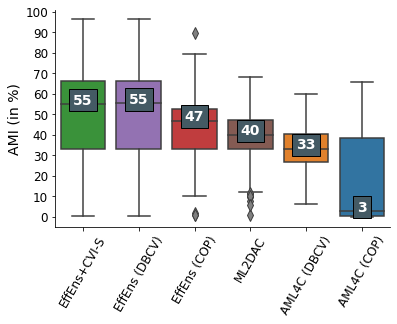

In [5]:
#plot_data = clustering_results[clustering_results["Method"].isin(["EffEns+CVI-S", "ML2DAC",
#                                                                  "EffEns (COP)", "AML4C (DBCV)"])]
plot_data = clustering_results[(clustering_results["iteration"] == 70) & (clustering_results["run"].isin(["run_0",
                                                                                              #"run_1",
                                                                                              "run_2"]))]
#plot_data = 
palette = sns.color_palette()
colors = {day: color for day, color in zip(clustering_results["Method"].unique(), palette)}

ax = sns.boxplot(data=plot_data,
                                   flierprops=flierprops, palette=colors,
            x="Method", y="Best NMI")

plt.xticks(rotation=60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(r'AMI (in %)', fontsize=14)
ax.set_yticks(list(range(0,110,10)))
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.set_xlabel("")
medians = plot_data.groupby(['Method'])['Best NMI'].median()
for xtick in ax.get_xticks():
    text = ax.text(xtick,medians[xtick],f'{round(medians[xtick])}',
            horizontalalignment='center',fontsize=14,
                   color='white',
                   weight='semibold',
                   bbox=dict(facecolor='#445A64')
                  )
plt.savefig("DG_AMI_comparison.pdf", bbox_inches='tight')

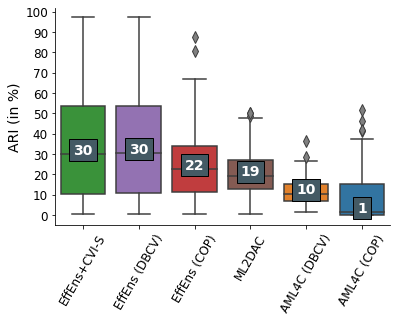

In [6]:

#plot_data = 
ax = sns.boxplot(data=plot_data,
                                   flierprops=flierprops,palette=colors,
            x="Method", y="Best ARI")
plt.xticks(rotation=60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(r'ARI (in %)', fontsize=14)
ax.set_yticks(list(range(0,110,10)))
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.set_xlabel("")
medians = plot_data.groupby(['Method'])['Best ARI'].median()
for xtick in ax.get_xticks():
    text = ax.text(xtick,medians[xtick],f'{round(medians[xtick])}',
            horizontalalignment='center',fontsize=14,
                   color='white',
                   weight='semibold',
                   bbox=dict(facecolor='#445A64')
                  )
plt.savefig("DG_ARI_comparison.pdf", bbox_inches='tight')

In [7]:
palette = sns.color_palette()
colors = {day: color for day, color in zip(clustering_results["Method"].unique(), palette)}
colors

{'AML4C (COP)': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'AML4C (DBCV)': (1.0, 0.4980392156862745, 0.054901960784313725),
 'EffEns+CVI-S': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'EffEns (COP)': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'EffEns (DBCV)': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'ML2DAC': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)}

C:\Users\tschecds\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


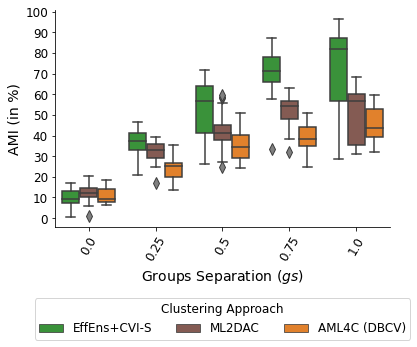

In [8]:
plot_data = clustering_results[clustering_results["Method"].isin(["EffEns+CVI-S", "ML2DAC",
                                                                  #"EffEns (COP)", 
                                                                  "AML4C (DBCV)"])]
plot_data["Method"] = pd.Categorical(plot_data["Method"], 
                                     categories=["EffEns+CVI-S",
                                                 "ML2DAC",
                                                 #"EffEns (COP)",
                                                 "AML4C (DBCV)"],
                                                  ordered=True)

plot_data = plot_data[(plot_data["iteration"] == 70) & (plot_data["run"].isin(["run_0", "run_2"]))]
plot_data = plot_data.sort_values("Method")
ax = sns.boxplot(x="gs", y="Best NMI", 
                     hue="Method",
                     #style="Method", markers=True,ci=None,
                     data=plot_data,
                      flierprops=flierprops, palette=colors
                 
                    # showfliers=False
                    )
plt.xticks(rotation=60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(r'AMI (in %)', fontsize=14)
ax.set_yticks(list(range(0,110,10)))
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.set_xlabel(r"Groups Separation ($gs$)", fontsize=14)
#add_median_labels(ax)
#ax.legend(labels=["Legend Label"])

legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, 
                   title="Clustering Approach",fontsize=12, title_fontsize=12)

plt.savefig("DG_AMI_comparison_group_separation.pdf", bbox_inches='tight')

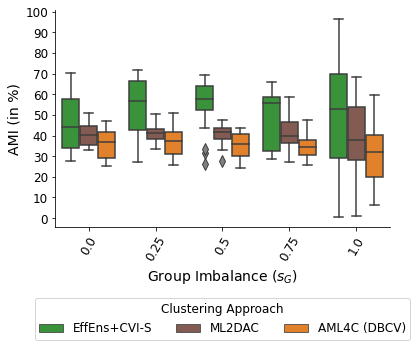

In [9]:

ax = sns.boxplot(x="sg", y="Best NMI", 
                     hue="Method",
                     #style="Method", markers=True,ci=None,
                     data=plot_data,
                      flierprops=flierprops,palette=colors

                    # showfliers=False
                    )
plt.xticks(rotation=60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(r'AMI (in %)', fontsize=14)
ax.set_yticks(list(range(0,110,10)))
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.set_xlabel(r"Group Imbalance ($s_G$)", fontsize=14)
#add_median_labels(ax)

legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, 
                   title="Clustering Approach",fontsize=12, title_fontsize=12)
plt.savefig("DG_AMI_comparison_group_imbalance.pdf", bbox_inches='tight')

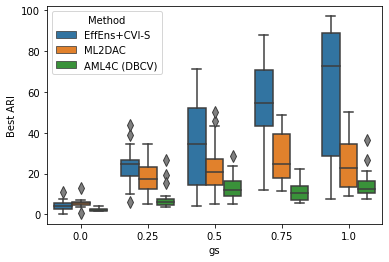

In [10]:

ax = sns.boxplot(x="gs", y="Best ARI", 
                     hue="Method",
                     #style="Method", markers=True,ci=None,
                     data=plot_data,
                      flierprops=flierprops,

                    # showfliers=False
                    )


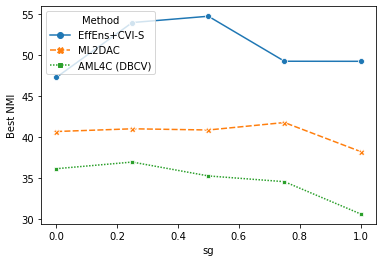

In [58]:
ax = sns.lineplot(x="sg", y="Best NMI", hue="Method", style="Method", markers=True,data=plot_data.reset_index(), ci=None)

# Classification Results

In [22]:
path_to_results = "../eval_dg_results/run_1/classification/accuracy/"
runs = os.listdir("../eval_dg_results/")
datasets = os.listdir(path_to_results)

In [23]:
len(datasets)

81

In [31]:
#results = pd.concat([pd.read_csv( f"../eval_dg_results/{run}/classification/accuracy/{data}") for run in runs for data in datasets], ignore_index=True)
results = pd.DataFrame()
for run in runs:
    if run == "predictions":
        continue
    for data in datasets:
        if "dataset5000" in data:
            continue
        df = pd.read_csv( f"../eval_dg_results/{run}/classification/accuracy/{data}")
        df["run"] = run
        df["dataset"] = data
        results = pd.concat([results, df])
results["n_loops"] = results["n_loops"].apply(lambda x: 0 if math.isnan(x) else x)
for column in ["accuracy", "F1_score", "balanced_acc", "precision", "recall"]:
    results[column] *= 100
results["Clustering"] = results["Clustering"].apply(lambda x: method_name_mapping[x] if x in method_name_mapping.keys() else "No Clustering")
method_values = list(method_name_mapping.values())
method_values.append("No Clustering")
results["Clustering"] = pd.Categorical(results["Clustering"], method_values, ordered=True)

In [32]:
results

,accuracy,F1_score,balanced_acc,precision,recall,Classifier,Clustering,n_loops,run,dataset
0,53.000000,9.947485,40.358439,11.530983,10.156162,BaseClassifier (RandomForestClassifier),No Clustering,0.0,run_0,dataset1000_clusters10_features10_gs025_sg1.csv
1,43.666667,7.060932,39.687323,7.087022,7.760031,BaseClassifier (LogisticRegression),No Clustering,0.0,run_0,dataset1000_clusters10_features10_gs025_sg1.csv
2,36.333333,8.735553,11.467658,8.699603,9.002539,BaseClassifier (DecisionTreeClassifier),No Clustering,0.0,run_0,dataset1000_clusters10_features10_gs025_sg1.csv
3,25.666667,1.458886,25.666667,0.916667,3.571429,BaseClassifier (DummyClassifier),No Clustering,0.0,run_0,dataset1000_clusters10_features10_gs025_sg1.csv
4,52.333333,10.715972,22.960352,10.660163,11.067198,ClustClassifier (RandomForestClassifier),EffEns (COP),5.0,run_0,dataset1000_clusters10_features10_gs025_sg1.csv
...,...,...,...,...,...,...,...,...,...,...
23,23.333333,1.455301,23.333333,0.897436,3.846154,ClustClassifier (DummyClassifier),AML4C (COP),70.0,run_3,dataset1000_clusters50_features50_gs1_sg1.csv
24,48.000000,26.051693,33.653343,27.181547,27.147050,ClustClassifier (RandomForestClassifier),AML4C (DBCV),70.0,run_3,dataset1000_clusters50_features50_gs1_sg1.csv
25,52.000000,27.801893,44.286279,32.363050,28.526316,ClustClassifier (LogisticRegression),AML4C (DBCV),70.0,run_3,dataset1000_clusters50_features50_gs1_sg1.csv
26,35.666667,18.824803,21.826046,19.568179,18.964264,ClustClassifier (DecisionTreeClassifier),AML4C (DBCV),70.0,run_3,dataset1000_clusters50_features50_gs1_sg1.csv


In [33]:
results["Approach"] = results.apply(lambda x:  x["Clustering"] + "+"+x["Classifier"].replace("ClustClassifier (", "").replace("BaseClassifier (", "").replace(")", ""), axis=1)
results["Classifier_"] = results.apply(lambda x:  x["Classifier"].replace("ClustClassifier (", "").replace("BaseClassifier (", "").replace(")", ""), axis=1)
results["Clustering_"] = results.apply(lambda x:  x["Clustering"].replace("No Clustering", "-"), axis=1)

In [86]:
df_for_pivot = results[(results["Clustering"].isin(['EffEns+CVI-S', 'No Clustering'])) & 
       (results["n_loops"].isin([0, 70])) & (results["run"] == "run_0")]
pivot_table = pd.pivot_table(df_for_pivot, index=["dataset", "Classifier_"], columns=["Clustering"], values=["accuracy"]).reset_index()
pivot_table["improvement"] = pivot_table["accuracy"]["EffEns+CVI-S"] - pivot_table["accuracy"]["No Clustering"]
pivot_table

dataset  \
Clustering                                                    
0           dataset1000_clusters10_features10_gs025_sg1.csv   
1           dataset1000_clusters10_features10_gs025_sg1.csv   
2           dataset1000_clusters10_features10_gs025_sg1.csv   
3           dataset1000_clusters10_features10_gs025_sg1.csv   
4            dataset1000_clusters10_features10_gs05_sg0.csv   
..                                                      ...   
319           dataset1000_clusters50_features50_gs0_sg1.csv   
320           dataset1000_clusters50_features50_gs1_sg1.csv   
321           dataset1000_clusters50_features50_gs1_sg1.csv   
322           dataset1000_clusters50_features50_gs1_sg1.csv   
323           dataset1000_clusters50_features50_gs1_sg1.csv   

                       Classifier_     accuracy               improvement  
Clustering                         EffEns+CVI-S No Clustering              
0           DecisionTreeClassifier    36.333333     36.333333    0.000000  
1                  DummyClassifier    41.666667     25.666667   16.000000  
2               LogisticRegression    49.666667     43.666667    6.000000  
3           RandomForestClassifier    50.000000     53.000000   -3.000000  
4           DecisionTreeClassifier    37.666667     40.666667   -3.000000  
..                             ...          ...           ...         ...  
319         RandomForestClassifier    20.333333     20.666667   -0.333333  
320         DecisionTreeClassifier    41.333333     44.000000   -2.666667  
321                DummyClassifier    44.333333     23.333333   21.000000  
322             LogisticRegression    54.333333     44.666667    9.666667  
323         RandomForestClassifier    45.666667     49.666667   -4.000000  

[324 rows x 5 columns]

In [87]:
pivot_table["#Improvements"] = pivot_table.groupby("Classifier_")["improvement"].transform(lambda x: int(x > 0))
pivot_table["#Equal"] = pivot_table.groupby("Classifier_")["improvement"].transform(lambda x: int(x ==0))
pivot_table["#Deterioriations"] = pivot_table.groupby("Classifier_")["improvement"].transform(lambda x: int(x < 0))


TypeError: cannot convert the series to <class 'int'>

In [82]:
pivot_table

dataset  \
Clustering                                                    
0           dataset1000_clusters10_features10_gs025_sg1.csv   
1           dataset1000_clusters10_features10_gs025_sg1.csv   
2           dataset1000_clusters10_features10_gs025_sg1.csv   
3           dataset1000_clusters10_features10_gs025_sg1.csv   
4            dataset1000_clusters10_features10_gs05_sg0.csv   
..                                                      ...   
319           dataset1000_clusters50_features50_gs0_sg1.csv   
320           dataset1000_clusters50_features50_gs1_sg1.csv   
321           dataset1000_clusters50_features50_gs1_sg1.csv   
322           dataset1000_clusters50_features50_gs1_sg1.csv   
323           dataset1000_clusters50_features50_gs1_sg1.csv   

                       Classifier_     accuracy               improvement  \
Clustering                         EffEns+CVI-S No Clustering               
0           DecisionTreeClassifier    36.333333     36.333333    0.000000   
1                  DummyClassifier    41.666667     25.666667   16.000000   
2               LogisticRegression    49.666667     43.666667    6.000000   
3           RandomForestClassifier    50.000000     53.000000   -3.000000   
4           DecisionTreeClassifier    37.666667     40.666667   -3.000000   
..                             ...          ...           ...         ...   
319         RandomForestClassifier    20.333333     20.666667   -0.333333   
320         DecisionTreeClassifier    41.333333     44.000000   -2.666667   
321                DummyClassifier    44.333333     23.333333   21.000000   
322             LogisticRegression    54.333333     44.666667    9.666667   
323         RandomForestClassifier    45.666667     49.666667   -4.000000   

           #Improvements #Equal #Deterioriations  
Clustering                                        
0                  False   True            False  
1                   True  False            False  
2                   True  False            False  
3                  False  False             True  
4                  False  False             True  
..                   ...    ...              ...  
319                False  False             True  
320                False  False             True  
321                 True  False            False  
322                 True  False            False  
323                False  False             True  

[324 rows x 8 columns]

In [91]:
for classifier_ in pivot_table["Classifier_"].unique():
    print(classifier_)
    classifier_pivot = pivot_table[(pivot_table["Classifier_"] == classifier_)]
    print(f"Improvements: {len(classifier_pivot[(pivot_table['improvement'] > 0)])}")
    print(f"Equal: {len(classifier_pivot[(pivot_table['improvement'] == 0)])}")
    print(f"Deterioriation: {len(classifier_pivot[(pivot_table['improvement'] < 0)])}")

    print("-----")

DecisionTreeClassifier
Improvements: 50
Equal: 3
Deterioriation: 28
-----
DummyClassifier
Improvements: 78
Equal: 2
Deterioriation: 1
-----
LogisticRegression
Improvements: 71
Equal: 4
Deterioriation: 6
-----
RandomForestClassifier
Improvements: 53
Equal: 1
Deterioriation: 27
-----


<ipython-input-91-093c5d0ba38b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"Improvements: {len(classifier_pivot[(pivot_table['improvement'] > 0)])}")
<ipython-input-91-093c5d0ba38b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"Equal: {len(classifier_pivot[(pivot_table['improvement'] == 0)])}")
<ipython-input-91-093c5d0ba38b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"Deterioriation: {len(classifier_pivot[(pivot_table['improvement'] < 0)])}")


In [37]:
results[(results["n_loops"].isin([70])) 
        & (results["Classifier"] == "ClustClassifier (RandomForestClassifier)")
       ].groupby(["Clustering", 
                 # "run"
                 ])["accuracy", "balanced_acc", 
                                 "F1_score", "precision",
                                 "recall"].median().round(1).reset_index()#.to_latex(index=False))

<ipython-input-37-acb14c44a7ce>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results[(results["n_loops"].isin([70]))


,Clustering,accuracy,balanced_acc,F1_score,precision,recall
0,EffEns+CVI-S,45.2,29.0,16.8,17.5,17.9
1,EffEns (DBCV),45.3,28.8,16.8,17.5,17.9
2,EffEns (COP),44.0,28.0,17.6,18.4,18.4
3,ML2DAC,43.0,26.4,16.5,17.3,17.3
4,AML4C (DBCV),42.7,25.3,17.2,17.8,17.7
5,AML4C (COP),41.8,29.1,15.0,16.3,16.3
6,No Clustering,NaN,NaN,NaN,NaN,NaN


In [39]:
print(results[(results["n_loops"].isin([0, 70])) 
        & (results["Clustering_"].isin(["EffEns+CVI-S", "-"]))
       ].groupby(["Classifier_", "Clustering_"])["accuracy", "F1_score", "balanced_acc"].describe().loc[:,(slice(None),['50%',
                                                                                                                      # 'mean'
                                                                                                                      ])].round(2).to_latex())

\begin{tabular}{llrrr}
\toprule
                       &              & accuracy & F1\_score & balanced\_acc \\
                       &              &      50\% &      50\% &          50\% \\
Classifier\_ & Clustering\_ &          &          &              \\
\midrule
DecisionTreeClassifier & - &    31.83 &    14.58 &        17.26 \\
                       & EffEns+CVI-S &    35.83 &    16.03 &        19.07 \\
DummyClassifier & - &    23.33 &     1.35 &        23.33 \\
                       & EffEns+CVI-S &    34.00 &     6.04 &        32.06 \\
LogisticRegression & - &    41.67 &    15.37 &        37.63 \\
                       & EffEns+CVI-S &    47.50 &    18.13 &        43.55 \\
RandomForestClassifier & - &    41.00 &    15.04 &        27.75 \\
                       & EffEns+CVI-S &    45.17 &    16.82 &        28.95 \\
\bottomrule
\end{tabular}



<ipython-input-39-2a39b38eb35e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(results[(results["n_loops"].isin([0, 70]))


In [44]:
table_classifier_data = results[(results["n_loops"].isin([0, 70])) 
        & (results["Clustering_"].isin(["EffEns+CVI-S", "-"]))
       ].groupby(["Classifier_", "Clustering_"])["accuracy", "F1_score", "balanced_acc"].mean().round(2).reset_index()
#table_classifier_data["accuracy_improvement"] = table_classifier_data
table_classifier_data

<ipython-input-44-c105d8c488fa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  table_classifier_data = results[(results["n_loops"].isin([0, 70]))


,Classifier_,Clustering_,accuracy,F1_score,balanced_acc
0,DecisionTreeClassifier,-,33.22,15.60,18.69
1,DecisionTreeClassifier,EffEns+CVI-S,35.18,16.39,19.71
2,DummyClassifier,-,20.25,1.19,20.25
3,DummyClassifier,EffEns+CVI-S,34.50,6.97,33.39
4,LogisticRegression,-,41.33,15.07,37.00
5,LogisticRegression,EffEns+CVI-S,46.37,18.06,42.84
6,RandomForestClassifier,-,41.61,16.15,29.49
7,RandomForestClassifier,EffEns+CVI-S,43.50,17.35,29.28


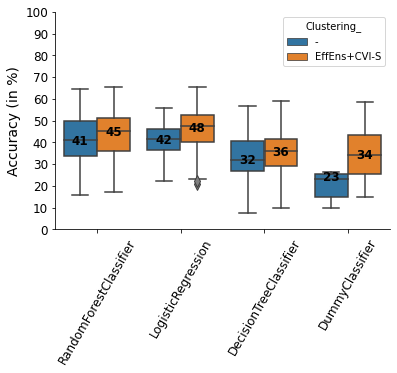

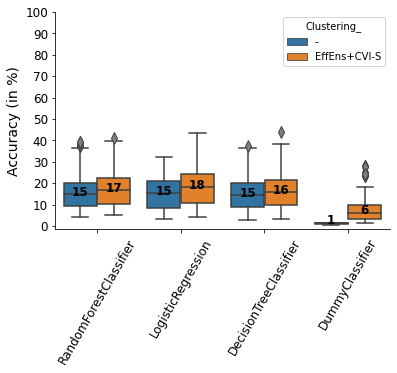

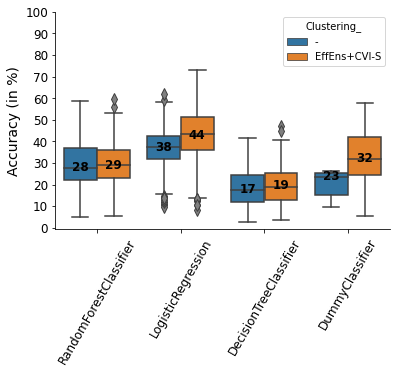

In [64]:
plot_classifier_data = results[(results["n_loops"].isin([0, 70])) 
        & (results["Clustering_"].isin(["EffEns+CVI-S", "-"]))]

for measure in ["accuracy", "F1_score", "balanced_acc"]:
    ax = sns.boxplot(data=plot_classifier_data, x="Classifier_", y=measure, hue="Clustering_", 
                     flierprops=flierprops)
    plt.xticks(rotation=60)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel(r'Accuracy (in %)', fontsize=14)
    ax.set_yticks(list(range(0,110,10)))
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.set_xlabel("")
    add_median_labels(ax)
    plt.show()
    plt.close()

# Minority/Majority Accuracy (Reports)

reports sind noch problematisch weil accuracy/macro average einfach am Ende eingefügt werden:
"
27,0.0,0.0,0.0,2.0,BaseClassifier (RandomForestClassifier),-
28,0.0,0.0,0.0,2.0,BaseClassifier (RandomForestClassifier),-
29,0.0,0.0,0.0,2.0,BaseClassifier (RandomForestClassifier),-
accuracy,0.7066666666666667,0.7066666666666667,0.7066666666666667,0.7066666666666667,BaseClassifier (RandomForestClassifier),-
macro avg,0.44966642790923245,0.28294981551450044,0.30924842922461404,1500.0,BaseClassifier (RandomForestClassifier),-
weighted avg,0.6818557268363169,0.7066666666666667,0.6703079811606135,1500.0,BaseClassifier (RandomForestClassifier),-"

In [65]:
path_to_results = "../eval_dg_results/run_0/classification/report/"
runs = os.listdir("../eval_dg_results/")
datasets = os.listdir(path_to_results)

In [75]:
#results = pd.concat([pd.read_csv( f"../eval_dg_results/{run}/classification/accuracy/{data}") for run in runs for data in datasets], ignore_index=True)
results = pd.DataFrame()
run = "run_0"
for data in datasets:
    df = pd.read_csv( f"../eval_dg_results/{run}/classification/report/{data}")
    df = df[df["n_loops"].isin([70, np.nan])]
    df["run"] = run
    df["dataset"] = data
    
    results = pd.concat([results, df])

In [76]:
results

,precision,recall,f1-score,support,Classifier,Clustering,n_loops,run,dataset
0,0.563636,0.805195,0.663102,77.00,BaseClassifier (RandomForestClassifier),-,NaN,run_0,dataset1000_clusters10_features10_gs025_sg1.csv
1,0.488372,0.677419,0.567568,62.00,BaseClassifier (RandomForestClassifier),-,NaN,run_0,dataset1000_clusters10_features10_gs025_sg1.csv
2,0.416667,0.250000,0.312500,20.00,BaseClassifier (RandomForestClassifier),-,NaN,run_0,dataset1000_clusters10_features10_gs025_sg1.csv
3,0.560000,0.666667,0.608696,63.00,BaseClassifier (RandomForestClassifier),-,NaN,run_0,dataset1000_clusters10_features10_gs025_sg1.csv
4,0.700000,0.333333,0.451613,21.00,BaseClassifier (RandomForestClassifier),-,NaN,run_0,dataset1000_clusters10_features10_gs025_sg1.csv
...,...,...,...,...,...,...,...,...,...
2959,0.000000,0.000000,0.000000,1.00,ClustClassifier (DummyClassifier),aml4c (DBCV),70.0,run_0,dataset1000_clusters50_features50_gs1_sg1.csv
2960,0.000000,0.000000,0.000000,1.00,ClustClassifier (DummyClassifier),aml4c (DBCV),70.0,run_0,dataset1000_clusters50_features50_gs1_sg1.csv
2961,0.450000,0.450000,0.450000,0.45,ClustClassifier (DummyClassifier),aml4c (DBCV),70.0,run_0,dataset1000_clusters50_features50_gs1_sg1.csv
2962,0.212864,0.226853,0.206748,300.00,ClustClassifier (DummyClassifier),aml4c (DBCV),70.0,run_0,dataset1000_clusters50_features50_gs1_sg1.csv


In [80]:
datasets = results["dataset"].unique()
classifiers = results["Classifier"].unique()
clusterings = results["Clustering"].unique()

filtered_results = pd.DataFrame()
for data in datasets:
    for classifier in classifiers:
        for clustering in ["-", "effens"]:
            filtered_df = results[(results["dataset"] == data) & (results["Classifier"]== classifier) & (results["Clustering"] == clustering)]
            if len(filtered_df) > 0:
                filtered_results = pd.concat([filtered_results, filtered_df], ignore_index=True)                

In [106]:
median_supprot = filtered_results.groupby(["Classifier", "Clustering", "dataset"])["support"].quantile(0.99)

def _get_median_support(x):
        return median_supprot.get((x["Classifier"], x["Clustering"], x["dataset"]))
        
filtered_results["Class Type"] = filtered_results.apply(lambda x: "Minority" if x["support"] < _get_median_support(x) else "Majority", axis=1)
median_supprot.get(("BaseClassifier (RandomForestClassifier)", "-", "dataset1000_clusters10_features10_gs025_sg1.csv"))

300.0

In [107]:
filtered_results

,precision,recall,f1-score,support,Classifier,Clustering,n_loops,run,dataset,Class Type
0,0.563636,0.805195,0.663102,77.000000,BaseClassifier (RandomForestClassifier),-,NaN,run_0,dataset1000_clusters10_features10_gs025_sg1.csv,Minority
1,0.488372,0.677419,0.567568,62.000000,BaseClassifier (RandomForestClassifier),-,NaN,run_0,dataset1000_clusters10_features10_gs025_sg1.csv,Minority
2,0.416667,0.250000,0.312500,20.000000,BaseClassifier (RandomForestClassifier),-,NaN,run_0,dataset1000_clusters10_features10_gs025_sg1.csv,Minority
3,0.560000,0.666667,0.608696,63.000000,BaseClassifier (RandomForestClassifier),-,NaN,run_0,dataset1000_clusters10_features10_gs025_sg1.csv,Minority
4,0.700000,0.333333,0.451613,21.000000,BaseClassifier (RandomForestClassifier),-,NaN,run_0,dataset1000_clusters10_features10_gs025_sg1.csv,Minority
...,...,...,...,...,...,...,...,...,...,...
20452,0.000000,0.000000,0.000000,1.000000,ClustClassifier (DummyClassifier),effens,70.0,run_0,dataset1000_clusters50_features50_gs1_sg1.csv,Minority
20453,0.000000,0.000000,0.000000,1.000000,ClustClassifier (DummyClassifier),effens,70.0,run_0,dataset1000_clusters50_features50_gs1_sg1.csv,Minority
20454,0.443333,0.443333,0.443333,0.443333,ClustClassifier (DummyClassifier),effens,70.0,run_0,dataset1000_clusters50_features50_gs1_sg1.csv,Minority
20455,0.110037,0.196106,0.140567,300.000000,ClustClassifier (DummyClassifier),effens,70.0,run_0,dataset1000_clusters50_features50_gs1_sg1.csv,Majority


In [108]:
filtered_results.groupby(["Classifier", "Clustering", "Class Type"])["f1-score"].mean()

Classifier                                Clustering  Class Type
BaseClassifier (DecisionTreeClassifier)   -           Majority      0.246253
                                                      Minority      0.164797
BaseClassifier (DummyClassifier)          -           Majority      0.042140
                                                      Minority      0.018265
BaseClassifier (LogisticRegression)       -           Majority      0.249940
                                                      Minority      0.158558
BaseClassifier (RandomForestClassifier)   -           Majority      0.267197
                                                      Minority      0.171406
ClustClassifier (DecisionTreeClassifier)  effens      Majority      0.255434
                                                      Minority      0.167863
ClustClassifier (DummyClassifier)         effens      Majority      0.154410
                                                      Minority      0.078820
ClustClassi

In [130]:
# from sklearn.metrics import accuracy_score
import numpy as np
true_labels = np.array([0, 1, 1, 1])  # True class labels
predicted_labels = np.array([0,  0, 1, 1])  # Predicted class labels

overall_accuracy = accuracy_score(true_labels, predicted_labels)
from sklearn.metrics import confusion_matrix


df = pd.DataFrame({"true_labels": true_labels, "pred_labels": predicted_labels})

df["accuracy"] = (df["true_labels"] == df["pred_labels"]).astype(int)

accuracies_per_class = []
for class_id in np.unique(true_labels):
    acc = accuracy_score(true_labels[np.where(true_labels == class_id)], predicted_labels[np.where(true_labels==class_id)])
    accuracies_per_class.append(acc)

In [127]:
accuracies_per_class

[1.0, 0.6666666666666666]

In [136]:
df.groupby("pred_labels")["accuracy"].mean()

pred_labels
0    0.5
1    1.0
Name: accuracy, dtype: float64

In [137]:
import pandas as pd

# Create a sample DataFrame
data = {'A': [1, 2, 3, 4, 5, 6],
        'B': ['a', 'b', 'c', 'd', 'e', 'f']}
df = pd.DataFrame(data)

# Access all rows except the last three rows
df_except_last_three = df.iloc[:-3]

print(df_except_last_three)


   A  B
0  1  a
1  2  b
2  3  c
